<h1>Hierarchical Clustering of minute data</h1>
<p>In this notebook the different consumption datasets are clustered with the hope of distinguishing the different household appliences.</p>

In [12]:
import numpy as np

import os
import inspect
import sys
import pandas as pd
import charts
import time

from opengrid.library import houseprint

from sklearn.cluster import MeanShift

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16,8

In [13]:
hp = houseprint.Houseprint()

Opening connection to Houseprint sheet
Opening spreadsheets
Parsing spreadsheets
24 Sites created
24 Devices created
75 sensors created
Houseprint parsing complete


In [14]:
device = hp.find_device('FL03001441')
device.get_sensors()

[
     Fluksosensor
     Key: 81fb589c911e808daa96a2064bebed41
     Type: electricity
     , 
     Fluksosensor
     Key: 212ce724e124fbde0fb649396375d099
     Type: gas
     , 
     Fluksosensor
     Key: c57f45b21e2ec21ab427f172478e1ca4
     Type: water
     , 
     Fluksosensor
     Key: 156e0abc64b00c5e98dbd3c17883b5f6
     Type: electricity
     , 
     Fluksosensor
     Key: e5306ee3a4235498592fc89ee0ede353
     Type: electricity
     ]

In [15]:
#Get Electricity data
head = pd.Timestamp('20151105')
tail = pd.Timestamp('20151115')
electr = hp.find_sensor('81fb589c911e808daa96a2064bebed41')
df_el = electr.get_data(head,tail,diff=True, unit='W')
df_el = df_el.dropna()

Using tmpo database from /data/.tmpo/tmpo.sqlite3


In [16]:
#Get Gas data
gas = hp.find_sensor('212ce724e124fbde0fb649396375d099')
df_ga = gas.get_data(head,tail,diff=True)
df_ga = df_ga.dropna()

In [17]:
#Get Water data
water = hp.find_sensor('c57f45b21e2ec21ab427f172478e1ca4')
df_wa = water.get_data(head,tail,diff=True)
df_wa = df_wa.dropna()

<h3>Cluster water and gas data</h3>
<p>In order to correctly cluster gas and water consumption the magnitudes must be of the same order.</p>

In [18]:
#Concatinate the two datasets and drop lines with zero values
result = pd.concat([df_wa[df_wa>0.05]/df_wa.max(), df_ga/df_ga.max()], axis=1).dropna()
result.columns = ['water', 'gas']

In [19]:
#convert pandas to np array
resultArray = result.as_matrix()

In [20]:
#Run clustering Algorithm
ms = MeanShift()
ms.fit(resultArray)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_cluster = len(np.unique(labels))
colors = 10*['g.', 'r.', 'c.', 'b.', 'k.', 'y.', 'm.']

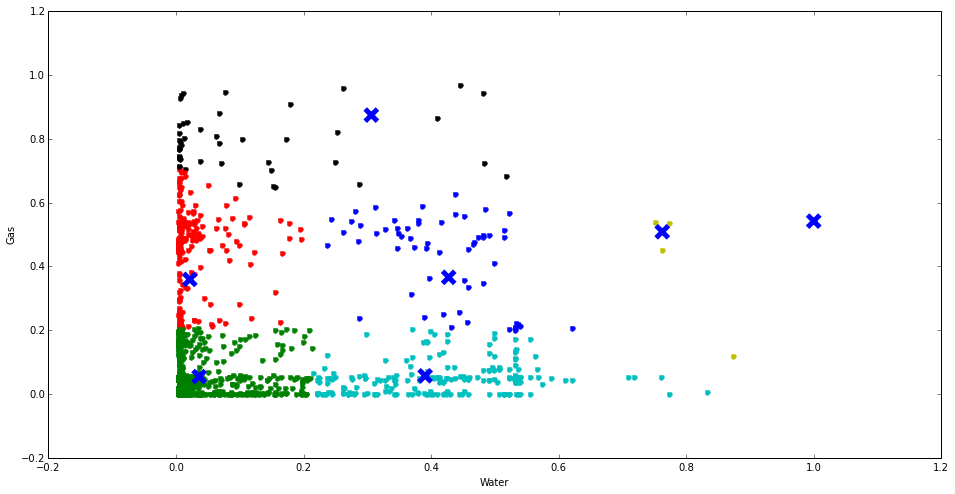

In [23]:
#Plot clusters
for i in range(len(resultArray)):
    plt.plot(resultArray[i][0], resultArray[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker = "x", s = 150, linewidths = 5, zorder = 10)
plt.ylabel('Gas')
plt.xlabel('Water')
plt.show()

<h3>Cluster water and electricity data</h3>
<p>In order to correctly cluster electricity and water consumption the magnitudes must be of the same order</p>

In [24]:
#Concatinate the two datasets and drop lines with zero values
result = pd.concat([df_wa[df_wa>0.05]/df_wa.max(), df_el/df_el.max()], axis=1).dropna()
result.columns = ['water', 'electricity']

In [25]:
#convert pandas to np array
resultArray = result.as_matrix()

In [26]:
#Run clustering Algorithm
ms = MeanShift()
ms.fit(resultArray)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_cluster = len(np.unique(labels))
colors = 10*['g.', 'r.', 'c.', 'b.', 'k.', 'y.', 'm.']

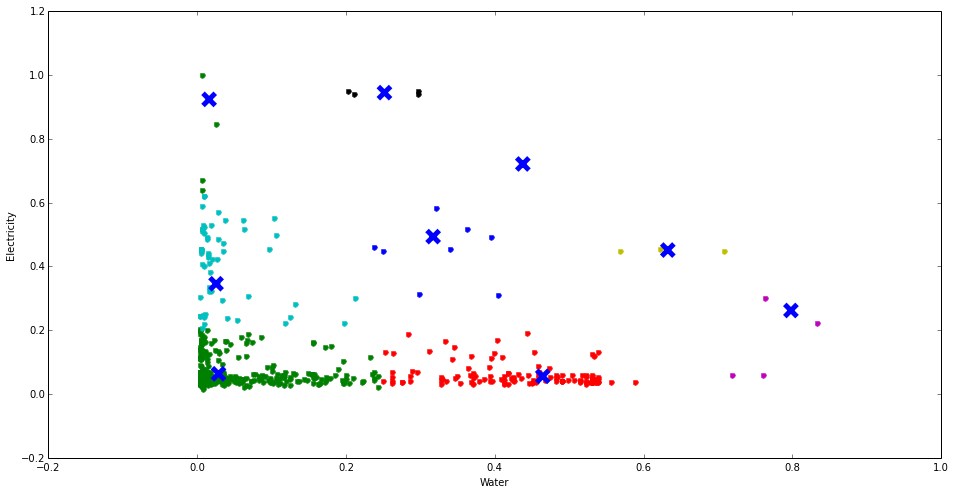

In [27]:
#Plot clusters
for i in range(len(resultArray)):
    plt.plot(resultArray[i][0], resultArray[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker = "x", s = 150, linewidths = 5, zorder = 10)
plt.ylabel('Electricity')
plt.xlabel('Water')
plt.show()

<h3>Cluster gas and electricity data</h3>
<p>In order to correctly cluster electricity and gas consumption the magnitudes must be of the same order</p>

In [28]:
#Concatinate the two datasets and drop lines with zero values
result = pd.concat([df_ga/df_ga.max(), df_el/df_el.max()], axis=1).dropna()
result.columns = ['gas', 'electricity']

In [29]:
#convert pandas to np array
resultArray = result.as_matrix()

In [30]:
#Run clustering Algorithm
ms = MeanShift()
ms.fit(resultArray)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_cluster = len(np.unique(labels))
colors = 10*['g.', 'r.', 'c.', 'b.', 'k.', 'y.', 'm.']

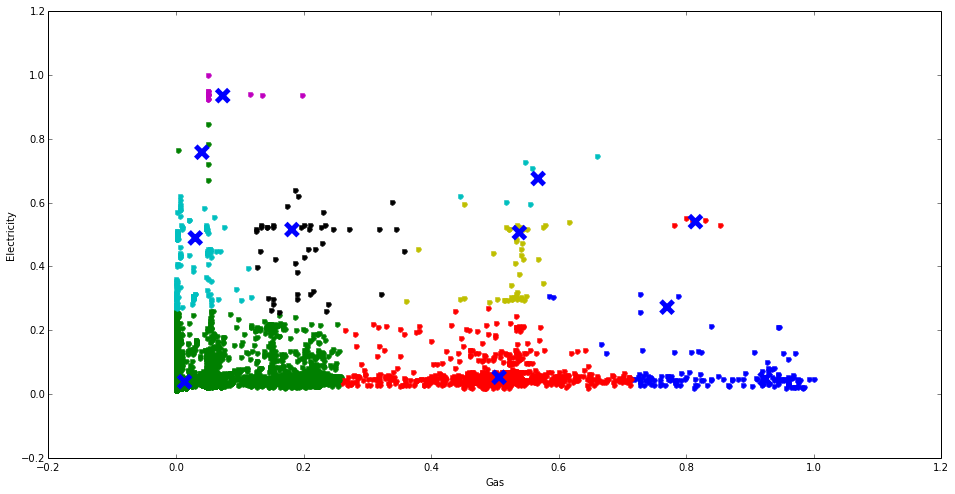

In [31]:
#Plot clusters
for i in range(len(resultArray)):
    plt.plot(resultArray[i][0], resultArray[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker = "x", s = 150, linewidths = 5, zorder = 10)
plt.ylabel('Electricity')
plt.xlabel('Gas')
plt.show()

<h3>Cluster gas, water and electricity data</h3>
<p>In order to correctly cluster electricity, water and gas consumption the magnitudes must be of the same order</p>

In [32]:
#Concatinate the two datasets and drop lines with zero values
result = pd.concat([df_ga/df_ga.max(), df_el/df_el.max(), df_wa/df_wa.max()], axis=1).dropna()
result.columns = ['gas', 'electricity', 'water']

In [33]:
#convert pandas to np array
resultArray = result.as_matrix()

In [34]:
#Run clustering Algorithm
ms = MeanShift()
ms.fit(resultArray)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_cluster = len(np.unique(labels))
colors = 10*['g', 'r', 'c', 'b', 'k', 'y', 'm']

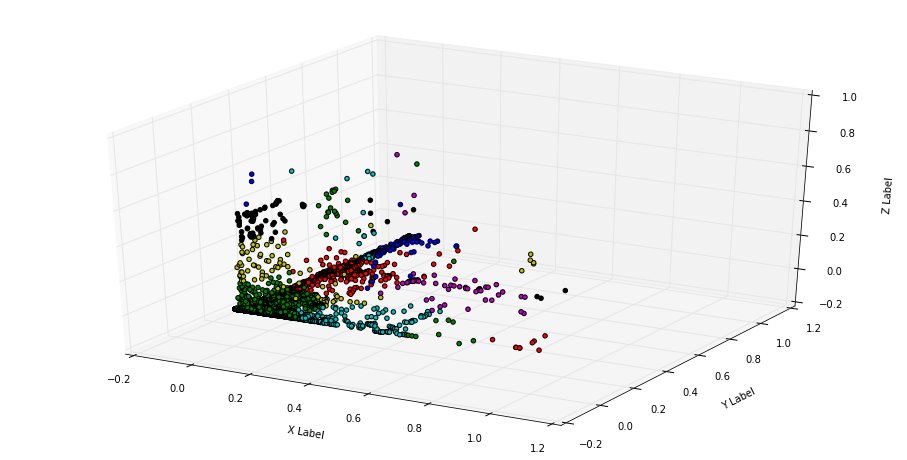

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for i in range(len(resultArray)):
    xs = resultArray[i][1]
    ys = resultArray[i][0]
    zs = resultArray[i][2]
    ax.scatter(xs, ys, zs, c=colors[labels[i]], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()